In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 375 kB/s 


In [ ]:
df1=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

In [ ]:
df1

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
df2=df1.drop(df1.columns[[0]],axis=1)      #To drop the column

In [ ]:
df2

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
df2['MMM-YY'].unique()

array(['01/01/19', '02/01/19', '03/01/19', '11/01/20', '12/01/20',
       '12/01/19', '01/01/20', '02/01/20', '03/01/20', '04/01/20',
       '08/01/20', '09/01/20', '10/01/20', '07/01/19', '08/01/19',
       '09/01/19', '10/01/19', '11/01/19', '04/01/19', '05/01/19',
       '06/01/19', '05/01/20', '06/01/20', '07/01/20'], dtype=object)

#Problem statement and EDA

## Problem statement

The drivers are leaving the company or stopping their services will lead to sudden decrement in the company revenue and company is also unable to serve their customers properly. This leads to lose of customer trust which actually impacts the company activities and growth.
So, it is important to find out the employees churn rate or predicting who will stay and leave will actually help the company to look for new resources and to plan accordingly for their sustainability.

##Observations and shape of Data

In [ ]:
df2.shape

(19104, 13)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


The shape of df2 is 19,104 rows and 12 columns

##EDA

In [ ]:
df2.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [ ]:
df2.columns=['MMM_YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income_Sum', 'Date_Of_Joining', 'Last_Working_Date', 'Joining_Designation',
       'Grade', 'Total_Business_Value', 'Quarterly_Rating']

In [ ]:
df2.describe(include='all')

,MMM_YY,Driver_ID,Age,Gender,City,Education_Level,Income_Sum,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


Everything looks appropriate but the total business value is seems have some outliers as there is business of 3 crore (+ve) and 60 lakhs (-ve).
So, eliminate the outliers and do the analysis.

In [ ]:
Q1=df2['Total_Business_Value'].quantile(0.25)
Q3=df2['Total_Business_Value'].quantile(0.75)
Q1,Q3
IQR=Q3-Q1

In [ ]:
df3=df2.loc[(df2['Total_Business_Value']>(Q1-1.5*IQR)) & (df2['Total_Business_Value']<(Q3+1.5*IQR))]

In [ ]:
df3.shape

(17733, 13)

So around 1300 rows were dropped

In [ ]:
df3.isna().sum()/df3.shape[0]

MMM_YY                  0.000000
Driver_ID               0.000000
Age                     0.003327
Gender                  0.002876
City                    0.000000
Education_Level         0.000000
Income_Sum              0.000000
Date_Of_Joining         0.000000
Last_Working_Date       0.909096
Joining_Designation     0.000000
Grade                   0.000000
Total_Business_Value    0.000000
Quarterly_Rating        0.000000
dtype: float64

Here we have to condense the results and can be drone through aggregation w.r.t driver _id

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3[(df3['Date_Of_Joining'])>(df3['MMM_YY'])]

,index,MMM_YY,Driver_ID,Age,Gender,City,Education_Level,Income_Sum,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
1,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
2,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
5,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17722,19093,03/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,NaN,1,1,319740,2
17723,19094,04/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,NaN,1,1,0,1
17724,19095,05/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,NaN,1,1,0,1
17725,19096,06/01/19,2787,28.0,1.0,C20,2,69498,21/07/18,20/06/19,1,1,0,1


There are some rows where actually the reporting date is previous to joining date so better compare month wise and year intsead of day.

In [ ]:
df3.drop(df3.columns[0],axis=1,inplace=True)

##Converting to date time period

In [ ]:
df3.loc[:,'MMM_YY']=pd.to_datetime(df3.loc[:,'MMM_YY']).dt.to_period('M')
df3.loc[:,'Date_Of_Joining']=pd.to_datetime(df3.loc[:,'Date_Of_Joining']).dt.to_period('M')
df3.loc[:,'Last_Working_Date']=pd.to_datetime(df3.loc[:,'Last_Working_Date']).dt.to_period('M')

The categorical features here are Gender, City, Education level, Joining designation, Grade, Quarterly rating.
But consider only Gender, City as the rest actually has order and its better to consider in that numerical order only.

##Conversion to categorical variables

In [ ]:
# df3.loc[:,'Age']=df3.loc[:,'Age'].astype('category')
df3.loc[:,'City']=df3.loc[:,'City'].astype('category')

In [ ]:
df3[(df3['Date_Of_Joining'])>(df3['MMM_YY'])]

,MMM_YY,Driver_ID,Age,Gender,City,Education_Level,Income_Sum,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating


In [ ]:
df3.sort_values(by=['Driver_ID','Date_Of_Joining','MMM_YY'],ascending=True)

,MMM_YY,Driver_ID,Age,Gender,City,Education_Level,Income_Sum,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,2019-02,1,28.0,0.0,C23,2,57387,2018-12,NaT,1,1,-665480,2
1,2019-03,1,28.0,0.0,C23,2,57387,2018-12,2019-03,1,1,0,2
2,2020-11,2,31.0,0.0,C7,2,67016,2020-11,NaT,2,2,0,1
3,2020-12,2,31.0,0.0,C7,2,67016,2020-11,NaT,2,2,0,1
4,2019-12,4,43.0,0.0,C13,2,65603,2019-12,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17728,2020-08,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,740280,3
17729,2020-09,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,448370,3
17730,2020-10,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,0,2
17731,2020-11,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,200420,2


We have to create new columns like Income at the time of joining and the latest income and similary for joining grade and the latest grade and also quarterly rating at the time of joining and the latest quarterly grade.

##Aggregating data as per Driver_ID

In [ ]:
joining_and_latest_income=df3.groupby(['Driver_ID']).agg(Income_Joined=('Income_Sum','first'),Income_Now=('Income_Sum','last'))
joining_and_latest_income.reset_index(inplace=True)

In [ ]:
# joining_and_latest_income[(joining_and_latest_income['Income_Joined']!=joining_and_latest_income['Income_Now'])]

In [ ]:
joining_and_latest_Quarterly_Rating=df3.groupby(['Driver_ID']).agg(Quarterly_Rating_Joined=('Quarterly_Rating','first'),Quarterly_Rating_Now=('Quarterly_Rating','last'))
joining_and_latest_Quarterly_Rating.reset_index(inplace=True)

In [ ]:
joining_and_latest_grade=df3.groupby(['Driver_ID']).agg(Grade_Joined=('Grade','first'),Grade_Now=('Grade','last'))
joining_and_latest_grade.reset_index(inplace=True)

In [ ]:
joining_and_latest_grade

,Driver_ID,Grade_Joined,Grade_Now
0,1,1,1
1,2,2,2
2,4,2,2
3,5,1,1
4,6,3,3
...,...,...,...
2376,2784,3,3
2377,2785,1,1
2378,2786,2,2
2379,2787,1,1


In [ ]:
joining_and_latest_grade[(joining_and_latest_grade['Grade_Joined'])>(joining_and_latest_grade['Grade_Now'])]

,Driver_ID,Grade_Joined,Grade_Now


Join the tables above with main df based on driver_id

In [ ]:
joining_and_latest_income

,Driver_ID,Income_Joined,Income_Now
0,1,57387,57387
1,2,67016,67016
2,4,65603,65603
3,5,46368,46368
4,6,78728,78728
...,...,...,...
2376,2784,82815,82815
2377,2785,12105,12105
2378,2786,35370,35370
2379,2787,69498,69498


In [ ]:
joining_and_latest_income[joining_and_latest_income['Income_Joined']!=joining_and_latest_income['Income_Now']]

,Driver_ID,Income_Joined,Income_Now
18,26,121529,132577
40,54,117993,127826
46,60,82126,89592
80,98,57977,63774
230,275,89124,97226
256,307,80856,88207
267,320,56813,63126
312,368,46719,51911
368,434,80469,88515
460,537,76868,84554


In [ ]:
df4 = pd.merge(df3, joining_and_latest_income, on="Driver_ID", how="left")
df5 = pd.merge(df4, joining_and_latest_grade,  on='Driver_ID', how='left')
df6=  pd.merge(df5, joining_and_latest_Quarterly_Rating,  on='Driver_ID', how='left')

In [ ]:
df6

,MMM_YY,Driver_ID,Age,Gender,City,Education_Level,Income_Sum,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Income_Joined,Income_Now,Grade_Joined,Grade_Now,Quarterly_Rating_Joined,Quarterly_Rating_Now
0,2019-02,1,28.0,0.0,C23,2,57387,2018-12,NaT,1,1,-665480,2,57387,57387,1,1,2,2
1,2019-03,1,28.0,0.0,C23,2,57387,2018-12,2019-03,1,1,0,2,57387,57387,1,1,2,2
2,2020-11,2,31.0,0.0,C7,2,67016,2020-11,NaT,2,2,0,1,67016,67016,2,2,1,1
3,2020-12,2,31.0,0.0,C7,2,67016,2020-11,NaT,2,2,0,1,67016,67016,2,2,1,1
4,2019-12,4,43.0,0.0,C13,2,65603,2019-12,NaT,2,2,0,1,65603,65603,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17728,2020-08,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,740280,3,70254,70254,2,2,1,2
17729,2020-09,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,448370,3,70254,70254,2,2,1,2
17730,2020-10,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,0,2,70254,70254,2,2,1,2
17731,2020-11,2788,30.0,0.0,C27,2,70254,2020-06,NaT,2,2,200420,2,70254,70254,2,2,1,2


Merging of rows and aggregation of fields

Aggregate the values as per driver id

In [ ]:
df6.columns

Index(['MMM_YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income_Sum', 'Date_Of_Joining', 'Last_Working_Date',
       'Joining_Designation', 'Grade', 'Total_Business_Value',
       'Quarterly_Rating', 'Income_Joined', 'Income_Now', 'Grade_Joined',
       'Grade_Now', 'Quarterly_Rating_Joined', 'Quarterly_Rating_Now'],
      dtype='object')

In [ ]:
columns_to_change={'MMM_YY':'last',
                   'Age':'last',
                   'Gender':'first',
                   'City':'first',
                   'Education_Level':'first',
                   'Income_Joined':'first',
                   'Income_Now':'last',
                   'Income_Sum':'sum',
                   'Date_Of_Joining':'first',
                   'Last_Working_Date':'last',
                   'Joining_Designation':'first',
                   'Grade_Joined':'first',
                   'Grade_Now':'last',
                   'Total_Business_Value':'sum',
                   'Quarterly_Rating_Joined':'first',
                   'Quarterly_Rating_Now':'last'
                   }

In [ ]:
df_new=df6.groupby(['Driver_ID'],as_index=False).agg(columns_to_change)
# df_new=df_new.sort_values(by=['trip_uuid','od_start_time'],ascending=True).reset_index()
df_new

,Driver_ID,MMM_YY,Age,Gender,City,Education_Level,Income_Joined,Income_Now,Income_Sum,Date_Of_Joining,Last_Working_Date,Joining_Designation,Grade_Joined,Grade_Now,Total_Business_Value,Quarterly_Rating_Joined,Quarterly_Rating_Now
0,1,2019-03,28.0,0.0,C23,2,57387,57387,114774,2018-12,2019-03,1,1,1,-665480,2,2
1,2,2020-12,31.0,0.0,C7,2,67016,67016,134032,2020-11,NaT,2,2,2,0,1,1
2,4,2020-04,43.0,0.0,C13,2,65603,65603,328015,2019-12,2020-04,2,2,2,350000,1,1
3,5,2019-03,29.0,0.0,C9,0,46368,46368,139104,2019-01,2019-03,1,1,1,120360,1,1
4,6,2020-12,31.0,1.0,C11,1,78728,78728,393640,2020-07,NaT,3,3,3,1265000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12,34.0,0.0,C24,0,82815,82815,1739115,2015-10,NaT,2,3,3,10037490,3,4
2377,2785,2020-10,34.0,1.0,C9,0,12105,12105,36315,2020-08,2020-10,1,1,1,0,1,1
2378,2786,2019-09,45.0,0.0,C19,0,35370,35370,318330,2018-07,2019-09,2,2,2,2815090,2,1
2379,2787,2019-06,28.0,1.0,C20,2,69498,69498,416988,2018-07,2019-06,1,1,1,977830,2,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   Driver_ID                2381 non-null   int64    
 1   MMM_YY                   2381 non-null   period[M]
 2   Age                      2381 non-null   float64  
 3   Gender                   2381 non-null   float64  
 4   City                     2381 non-null   category 
 5   Education_Level          2381 non-null   int64    
 6   Income_Joined            2381 non-null   int64    
 7   Income_Now               2381 non-null   int64    
 8   Income_Sum               2381 non-null   int64    
 9   Date_Of_Joining          2381 non-null   period[M]
 10  Last_Working_Date        1612 non-null   period[M]
 11  Joining_Designation      2381 non-null   int64    
 12  Grade_Joined             2381 non-null   int64    
 13  Grade_Now                2381 non-null   int64  

##Feature Engineering

In [ ]:
def func(x):
  if str(type(x))=="<class 'pandas._libs.tslibs.period.Period'>":
    return 1
  else:
    return 0

In [ ]:
df_new['Employee_Churned']=df_new['Last_Working_Date'].apply(lambda x: func(x))

In [ ]:
df_new['Employee_Churned'].value_counts()

1    1612
0     769
Name: Employee_Churned, dtype: int64

In [ ]:
def increment(x,y):
  if x>y:
    return 1
  else:
    return 0

In [ ]:
df_new['Income_Increment']=df_new.apply(lambda x: increment(x['Income_Now'],x['Income_Joined']),axis=1)
df_new['Quarterly_Increment']=df_new.apply(lambda x: increment(x['Quarterly_Rating_Now'],x['Quarterly_Rating_Joined']),axis=1)
df_new['Grade_Increment']=df_new.apply(lambda x: increment(x['Grade_Now'],x['Grade_Joined']),axis=1)

##Statistical Summary

In [ ]:
df_new.describe(include='all')

,Driver_ID,MMM_YY,Age,Gender,City,Education_Level,Income_Joined,Income_Now,Income_Sum,Date_Of_Joining,...,Joining_Designation,Grade_Joined,Grade_Now,Total_Business_Value,Quarterly_Rating_Joined,Quarterly_Rating_Now,Employee_Churned,Income_Increment,Quarterly_Increment,Grade_Increment
count,2381.000000,2381,2381.000000,2381.000000,2381,2381.00000,2381.000000,2381.000000,2.381000e+03,2381,...,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
unique,NaN,24,NaN,NaN,29,NaN,NaN,NaN,NaN,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-12,NaN,NaN,C20,NaN,NaN,NaN,NaN,2020-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,745,NaN,NaN,152,NaN,NaN,NaN,NaN,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1397.559009,NaN,33.660227,0.410332,NaN,1.00756,59209.060899,59333.370013,4.762508e+05,NaN,...,1.820244,2.078538,2.096598,2.614207e+06,1.482150,1.426711,0.677026,0.018060,0.149517,0.018060
std,806.161628,NaN,5.981067,0.491997,NaN,0.81629,28275.899087,28381.988149,5.102465e+05,NaN,...,0.841433,0.931321,0.941522,4.030245e+06,0.829217,0.806606,0.467711,0.133195,0.356672,0.133195
min,1.000000,NaN,21.000000,0.000000,NaN,0.00000,10747.000000,10747.000000,1.088300e+04,NaN,...,1.000000,1.000000,1.000000,-6.966100e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,695.000000,NaN,29.000000,0.000000,NaN,0.00000,39104.000000,39104.000000,1.388980e+05,NaN,...,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1400.000000,NaN,33.000000,0.000000,NaN,1.00000,55276.000000,55315.000000,2.890860e+05,NaN,...,2.000000,2.000000,2.000000,7.491500e+05,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2100.000000,NaN,37.000000,1.000000,NaN,2.00000,75765.000000,75986.000000,6.092730e+05,NaN,...,2.000000,3.000000,3.000000,3.261990e+06,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000


##Missing values

In [ ]:
df_new.isna().sum()/df_new.shape[0]

Driver_ID                  0.000000
MMM_YY                     0.000000
Age                        0.000000
Gender                     0.000000
City                       0.000000
Education_Level            0.000000
Income_Joined              0.000000
Income_Now                 0.000000
Income_Sum                 0.000000
Date_Of_Joining            0.000000
Last_Working_Date          0.322974
Joining_Designation        0.000000
Grade_Joined               0.000000
Grade_Now                  0.000000
Total_Business_Value       0.000000
Quarterly_Rating_Joined    0.000000
Quarterly_Rating_Now       0.000000
Employee_Churned           0.000000
Income_Increment           0.000000
Quarterly_Increment        0.000000
Grade_Increment            0.000000
dtype: float64

**With last working day we have created the employee churn, so therefore it is not much useful and we can drop this column**

##Outlier treatment

**The column Total business value has median and mean are far apart so remove outliers for this column**

In [ ]:
Q1=df_new['Total_Business_Value'].quantile(0.25)
Q3=df_new['Total_Business_Value'].quantile(0.75)
Q1,Q3
IQR=Q3-Q1

In [ ]:
IQR

3261990.0

In [ ]:
Q1,Q3

(0.0, 3261990.0)

In [ ]:
Q1-1.5*IQR,Q3+1.5*IQR

(-4892985.0, 8154975.0)

In [ ]:
df_new=df_new.loc[(df_new['Total_Business_Value']>(Q1-1.5*IQR)) & (df_new['Total_Business_Value']<(Q3+1.5*IQR))]

In [ ]:
df_new.describe()

,Driver_ID,Age,Gender,Education_Level,Income_Joined,Income_Now,Income_Sum,Joining_Designation,Grade_Joined,Grade_Now,Total_Business_Value,Quarterly_Rating_Joined,Quarterly_Rating_Now,Employee_Churned,Income_Increment,Quarterly_Increment,Grade_Increment
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2.109000e+03,2109.000000,2109.000000,2109.000000,2.109000e+03,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,1396.699384,33.085349,0.409199,1.005690,56950.316264,56975.937411,3.475790e+05,1.873400,2.015647,2.019440,1.366593e+06,1.344713,1.284021,0.743006,0.003793,0.127074,0.003793
std,805.052683,5.693243,0.491803,0.820726,26908.437252,26936.587849,3.243800e+05,0.842761,0.888596,0.891719,1.909513e+06,0.701852,0.655900,0.437080,0.061487,0.333135,0.061487
min,1.000000,21.000000,0.000000,0.000000,10747.000000,10747.000000,1.088300e+04,1.000000,1.000000,1.000000,-6.966100e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,690.000000,29.000000,0.000000,0.000000,37944.000000,37944.000000,1.276530e+05,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1405.000000,33.000000,0.000000,1.000000,53355.000000,53355.000000,2.469270e+05,2.000000,2.000000,2.000000,4.582000e+05,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2091.000000,37.000000,1.000000,2.000000,71977.000000,71977.000000,4.529280e+05,2.000000,3.000000,3.000000,1.995640e+06,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2788.000000,58.000000,1.000000,2.000000,167758.000000,167758.000000,2.992740e+06,5.000000,5.000000,5.000000,8.107300e+06,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


##Univariate analysis

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2380
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   Driver_ID                2109 non-null   int64    
 1   MMM_YY                   2109 non-null   period[M]
 2   Age                      2109 non-null   float64  
 3   Gender                   2109 non-null   float64  
 4   City                     2109 non-null   category 
 5   Education_Level          2109 non-null   int64    
 6   Income_Joined            2109 non-null   int64    
 7   Income_Now               2109 non-null   int64    
 8   Income_Sum               2109 non-null   int64    
 9   Date_Of_Joining          2109 non-null   period[M]
 10  Last_Working_Date        1567 non-null   period[M]
 11  Joining_Designation      2109 non-null   int64    
 12  Grade_Joined             2109 non-null   int64    
 13  Grade_Now                2109 non-null   int64  

In [ ]:
df_new['MMM_YY'].nunique()

24

In [ ]:
sorted(df_new['MMM_YY'].unique())

[Period('2019-01', 'M'),
 Period('2019-02', 'M'),
 Period('2019-03', 'M'),
 Period('2019-04', 'M'),
 Period('2019-05', 'M'),
 Period('2019-06', 'M'),
 Period('2019-07', 'M'),
 Period('2019-08', 'M'),
 Period('2019-09', 'M'),
 Period('2019-10', 'M'),
 Period('2019-11', 'M'),
 Period('2019-12', 'M'),
 Period('2020-01', 'M'),
 Period('2020-02', 'M'),
 Period('2020-03', 'M'),
 Period('2020-04', 'M'),
 Period('2020-05', 'M'),
 Period('2020-06', 'M'),
 Period('2020-07', 'M'),
 Period('2020-08', 'M'),
 Period('2020-09', 'M'),
 Period('2020-10', 'M'),
 Period('2020-11', 'M'),
 Period('2020-12', 'M')]

In [ ]:
df_new['MMM_YY']=df_new['MMM_YY'].astype('category')
df_new['Gender']=df_new['Gender'].astype('category')

In [ ]:
df_new['City']=df_new['City'].astype('category')

In [ ]:
df_new['Education_Level'].unique()

array([2, 0, 1])

In [ ]:
df_new['Education_Level']=df_new['Education_Level'].astype('category')

In [ ]:
sorted(df_new['Date_Of_Joining'].unique())

[Period('2013-04', 'M'),
 Period('2013-06', 'M'),
 Period('2013-07', 'M'),
 Period('2013-08', 'M'),
 Period('2013-09', 'M'),
 Period('2013-10', 'M'),
 Period('2013-11', 'M'),
 Period('2014-05', 'M'),
 Period('2014-07', 'M'),
 Period('2014-08', 'M'),
 Period('2014-09', 'M'),
 Period('2014-10', 'M'),
 Period('2014-12', 'M'),
 Period('2015-02', 'M'),
 Period('2015-05', 'M'),
 Period('2015-06', 'M'),
 Period('2015-07', 'M'),
 Period('2015-08', 'M'),
 Period('2015-09', 'M'),
 Period('2015-10', 'M'),
 Period('2015-11', 'M'),
 Period('2015-12', 'M'),
 Period('2016-01', 'M'),
 Period('2016-02', 'M'),
 Period('2016-03', 'M'),
 Period('2016-04', 'M'),
 Period('2016-05', 'M'),
 Period('2016-06', 'M'),
 Period('2016-07', 'M'),
 Period('2016-08', 'M'),
 Period('2016-09', 'M'),
 Period('2016-10', 'M'),
 Period('2016-11', 'M'),
 Period('2016-12', 'M'),
 Period('2017-01', 'M'),
 Period('2017-02', 'M'),
 Period('2017-03', 'M'),
 Period('2017-05', 'M'),
 Period('2017-06', 'M'),
 Period('2017-07', 'M'),


There were total of 80 joining dates and with this we can calcualate the experience of employees by subtracting from last reporting month (MMM_YY)

In [ ]:
x='2013-04'
x=pd.to_datetime(x)

In [ ]:
x

Timestamp('2013-04-01 00:00:00')

In [ ]:
def experience(x,y):
  x=pd.to_datetime(str(x))
  y=pd.to_datetime(str(y))
  return (x-y)/ np.timedelta64(1, 'Y')

In [ ]:
df_new['Experience']=df_new.apply(lambda x: experience(x['MMM_YY'],x['Date_Of_Joining']),axis=1)

In [ ]:
df_new['Experience'].describe()     # in years

count    2109.000000
mean        0.822090
std         1.096652
min         0.000000
25%         0.249150
50%         0.418900
75%         0.917199
max         7.501865
Name: Experience, dtype: float64

In [ ]:
df_new[df_new['Joining_Designation']!=df_new['Grade_Joined']][['Driver_ID','Joining_Designation','Grade_Joined']]

,Driver_ID,Joining_Designation,Grade_Joined
16,24,1,2
36,49,1,2
65,81,1,2
87,106,1,3
92,111,2,3
...,...,...,...
2333,2731,1,2
2334,2732,1,3
2351,2753,1,5
2364,2768,1,2


**IMP NOTE: As the Grade joined has the first value of the data selected during 2019 and 2020. But some of the joinings might be during before 2019. so drop the Grade_Joined and use the joining Designation to know the jump in the grade or not.**

In [ ]:
df_new['Grade_Increment']=df_new.apply(lambda x: increment(x['Joining_Designation'],x['Grade_Joined']),axis=1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   Driver_ID                2109 non-null   int64    
 1   MMM_YY                   2109 non-null   category 
 2   Age                      2109 non-null   float64  
 3   Gender                   2109 non-null   category 
 4   City                     2109 non-null   category 
 5   Education_Level          2109 non-null   category 
 6   Income_Joined            2109 non-null   int64    
 7   Income_Now               2109 non-null   int64    
 8   Income_Sum               2109 non-null   int64    
 9   Date_Of_Joining          2109 non-null   period[M]
 10  Last_Working_Date        1567 non-null   period[M]
 11  Joining_Designation      2109 non-null   int64    
 12  Grade_Joined             2109 non-null   int64    
 13  Grade_Now                2109 non-null   int64  

In [ ]:
df_new['Joining_Designation']=df_new['Joining_Designation'].astype('category')
df_new['Grade_Now']=df_new['Grade_Now'].astype('category')
df_new['Quarterly_Rating_Joined']=df_new['Quarterly_Rating_Joined'].astype('category')
df_new['Quarterly_Rating_Now']=df_new['Quarterly_Rating_Now'].astype('category')
# df_new['Employee_Churned']=df_new['Employee_Churned'].astype('category')
df_new['Income_Increment']=df_new['Income_Increment'].astype('category')
df_new['Quarterly_Increment']=df_new['Quarterly_Increment'].astype('category')
df_new['Grade_Increment']=df_new['Grade_Increment'].astype('category')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   Driver_ID                2109 non-null   int64    
 1   MMM_YY                   2109 non-null   category 
 2   Age                      2109 non-null   float64  
 3   Gender                   2109 non-null   category 
 4   City                     2109 non-null   category 
 5   Education_Level          2109 non-null   category 
 6   Income_Joined            2109 non-null   int64    
 7   Income_Now               2109 non-null   int64    
 8   Income_Sum               2109 non-null   int64    
 9   Date_Of_Joining          2109 non-null   period[M]
 10  Last_Working_Date        1567 non-null   period[M]
 11  Joining_Designation      2109 non-null   category 
 12  Grade_Joined             2109 non-null   int64    
 13  Grade_Now                2109 non-null   categor

##drop the columns

In [ ]:
drop_columns=['Driver_ID','Date_Of_Joining','Last_Working_Date','Grade_Joined']
df_new.drop(columns=drop_columns,axis=1,inplace=True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2380
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   MMM_YY                   2109 non-null   category
 1   Age                      2109 non-null   float64 
 2   Gender                   2109 non-null   category
 3   City                     2109 non-null   category
 4   Education_Level          2109 non-null   category
 5   Income_Joined            2109 non-null   int64   
 6   Income_Now               2109 non-null   int64   
 7   Income_Sum               2109 non-null   int64   
 8   Joining_Designation      2109 non-null   category
 9   Grade_Now                2109 non-null   category
 10  Total_Business_Value     2109 non-null   int64   
 11  Quarterly_Rating_Joined  2109 non-null   category
 12  Quarterly_Rating_Now     2109 non-null   category
 13  Employee_Churned         2109 non-null   int64   
 14  Income_I

In [ ]:
categorical_columns=df_new.select_dtypes(include='category').columns
numerical_columns=df_new.select_dtypes(include='number').columns

In [ ]:
categorical_columns

Index(['MMM_YY', 'Gender', 'City', 'Education_Level', 'Joining_Designation',
       'Grade_Now', 'Quarterly_Rating_Joined', 'Quarterly_Rating_Now',
       'Income_Increment', 'Quarterly_Increment', 'Grade_Increment'],
      dtype='object')

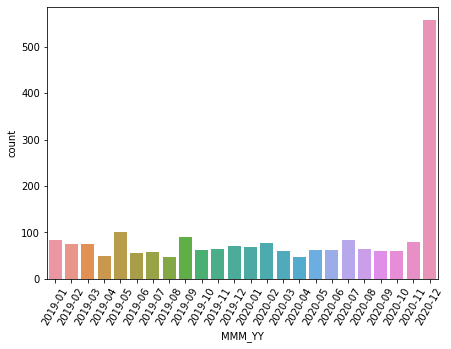

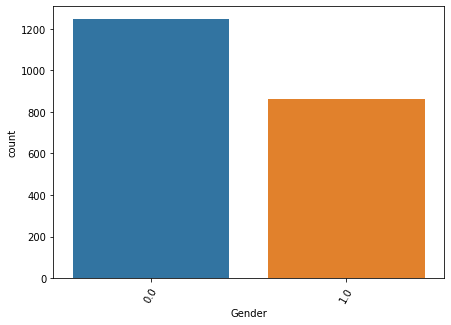

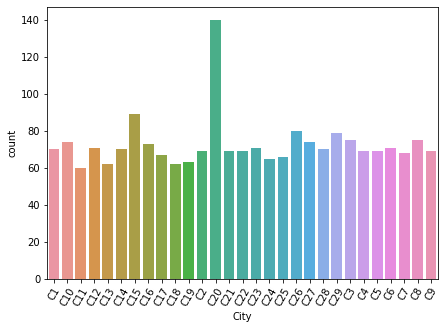

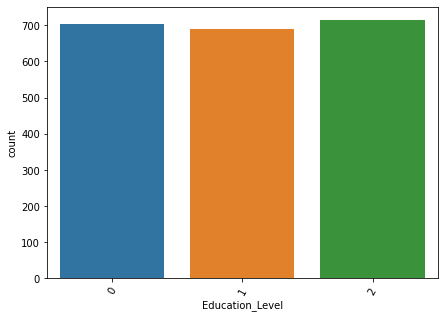

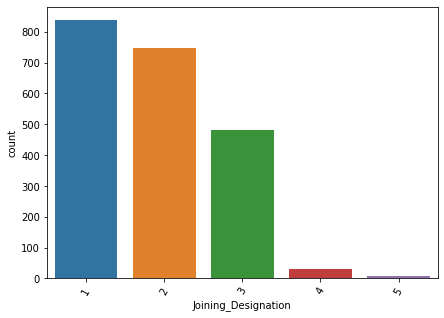

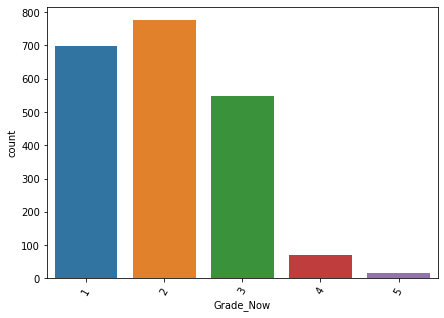

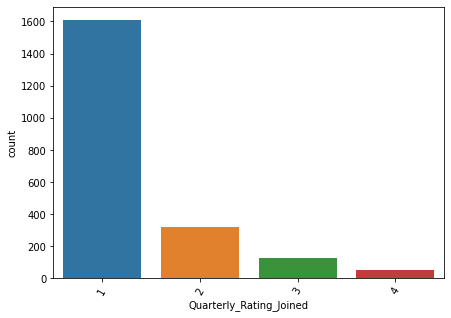

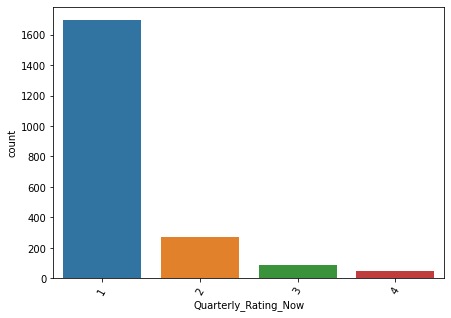

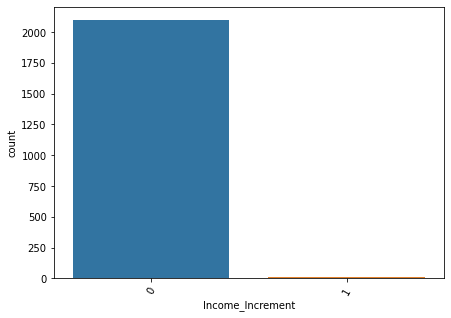

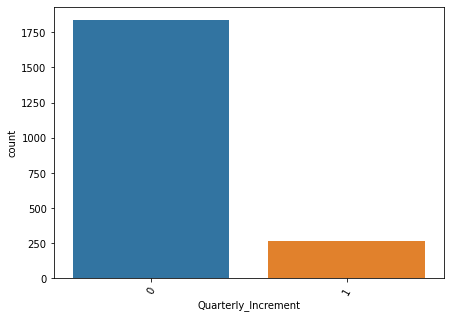

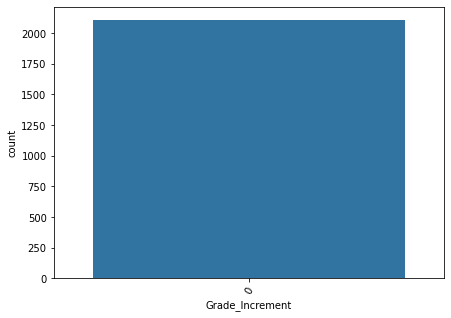

In [ ]:
for i in categorical_columns:
  if df_new[i].nunique()<30:
    plt.figure(figsize=(7,5))
    sns.countplot(x=i,data=df_new)
    plt.xticks(rotation=60)
    # plt.ylabel(i)
    plt.show()

In [ ]:
for i in categorical_columns:
  if df_new[i].nunique()<30:
    print(f'{i}: {df_new[i].value_counts(normalize=True)}')
    print('______')

MMM_YY: 2020-12    0.264580
2019-05    0.047890
2019-09    0.042674
2019-01    0.039829
2020-07    0.039355
2020-11    0.037459
2020-02    0.036510
2019-03    0.035562
2019-02    0.035562
2019-12    0.033665
2020-01    0.032243
2019-11    0.030346
2020-08    0.030346
2019-10    0.029872
2020-05    0.029872
2020-06    0.028924
2020-10    0.028450
2020-03    0.028450
2020-09    0.027975
2019-07    0.027501
2019-06    0.026079
2019-04    0.022760
2019-08    0.022285
2020-04    0.021811
Name: MMM_YY, dtype: float64
______
Gender: 0.0    0.590801
1.0    0.409199
Name: Gender, dtype: float64
______
City: C20    0.066382
C15    0.042200
C26    0.037933
C29    0.037459
C8     0.035562
C3     0.035562
C27    0.035088
C10    0.035088
C16    0.034614
C12    0.033665
C6     0.033665
C23    0.033665
C28    0.033191
C1     0.033191
C14    0.033191
C4     0.032717
C5     0.032717
C22    0.032717
C21    0.032717
C2     0.032717
C9     0.032717
C7     0.032243
C17    0.031769
C25    0.031294
C24    0.0

Observations and insights

1. The Male Gender is more compared to Female Gender.
2. More of the drivers are from City C20.
3. No.of drivers is almost same for each of the education level.
4. Joining designation with grade 1 is more
5. Grade increment is none as we observe only 0.
6. Quarterly increment is almost none and only few drivers have increment.
7. Employee churned is more.

In [ ]:
numerical_columns

Index(['Age', 'Income_Joined', 'Income_Now', 'Income_Sum',
       'Total_Business_Value', 'Employee_Churned', 'Experience'],
      dtype='object')

<Figure size 504x360 with 0 Axes>

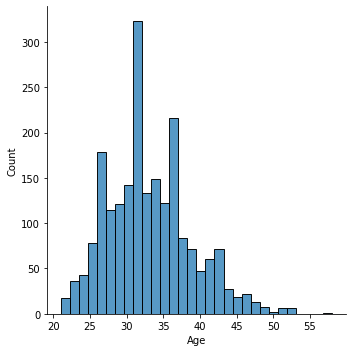

<Figure size 504x360 with 0 Axes>

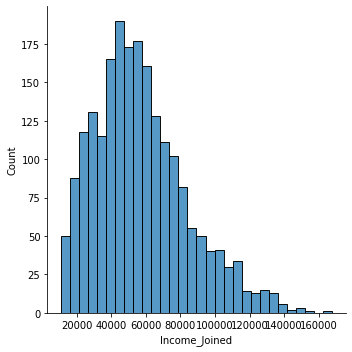

<Figure size 504x360 with 0 Axes>

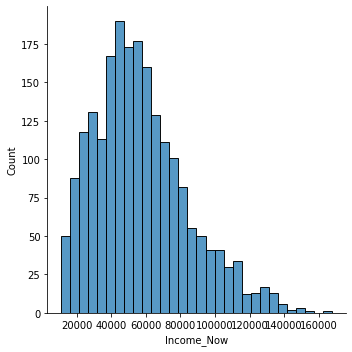

<Figure size 504x360 with 0 Axes>

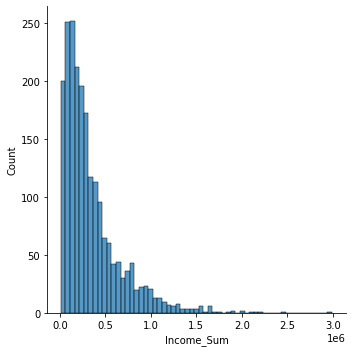

<Figure size 504x360 with 0 Axes>

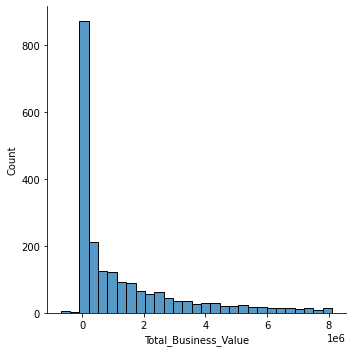

<Figure size 504x360 with 0 Axes>

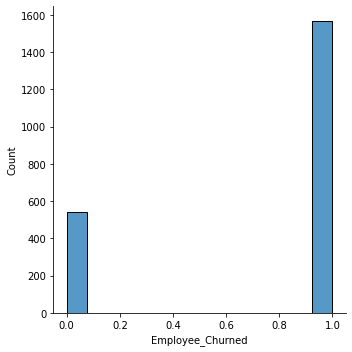

<Figure size 504x360 with 0 Axes>

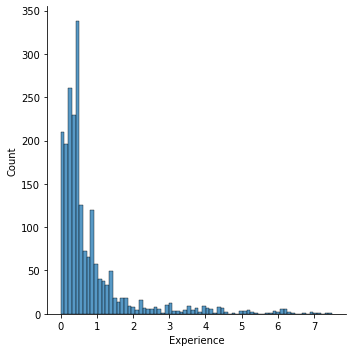

In [ ]:
for i in numerical_columns:
  plt.figure(figsize=(7,5))
  sns.displot(x=i,data=df_new)
  plt.show()

Observations and Insights

1. Age is almost following normal distribution
2. Income when joined, Income now and Income sum is following right skewed distribution.
3. Total Business value of 0 is more.
4. Experience is also following right skewed.

##Bivariate Analysis

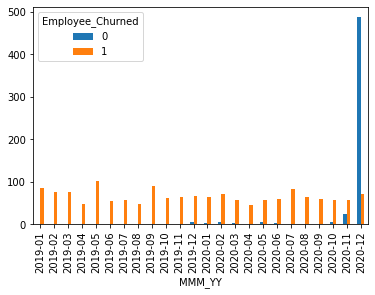

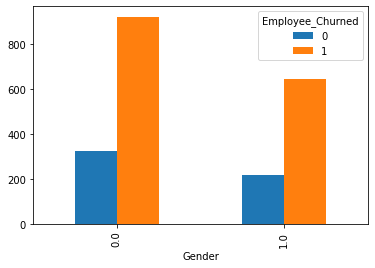

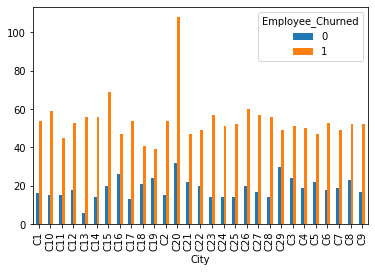

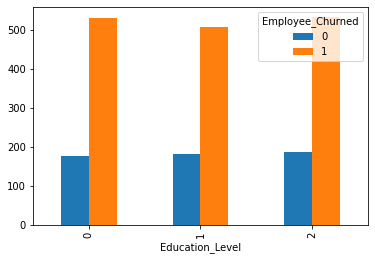

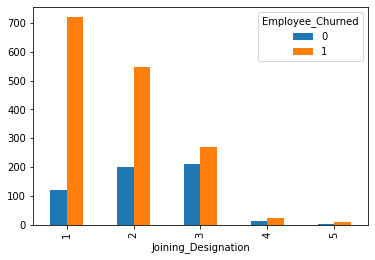

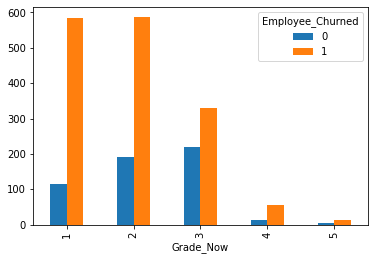

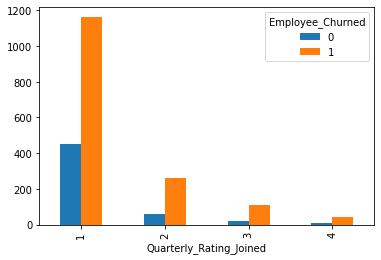

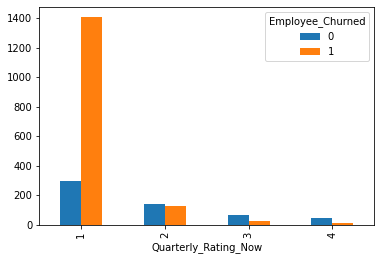

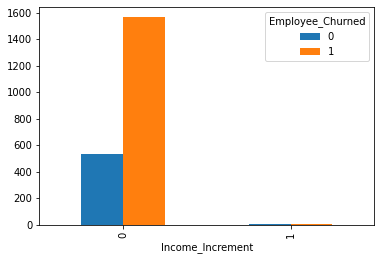

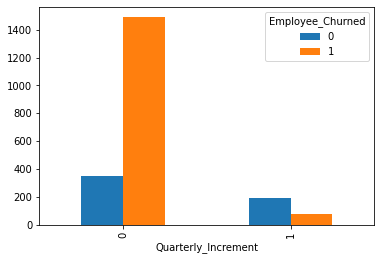

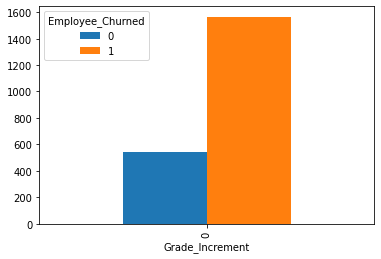

In [ ]:
for i in categorical_columns:
  if i!='Employee_Churned' and df_new[i].nunique()<30:
    pd.crosstab(df_new[i],df_new['Employee_Churned']).plot(kind='bar')
    plt.show()

In [ ]:
df_new[['Income_Increment','Employee_Churned']].value_counts()

Income_Increment  Employee_Churned
0                 1                   1565
                  0                    536
1                 0                      6
                  1                      2
dtype: int64

As the Income increment numbers are small we can remove the column in analysis.

In [ ]:
df_new.drop(columns=['MMM_YY','Income_Increment','Grade_Increment'],axis=1,inplace=True)

Observations and Insights

1. churned ratio is almost same for both the genders
2. Churned ratio is same for all the education level.
3. Whoever joined in grade 1 and currently under grade 1, are the ones who leaving the company.
4. Whoever not received quarterly increment, their churn chances are more.

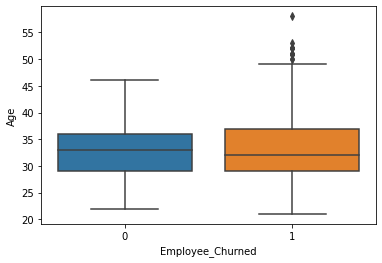

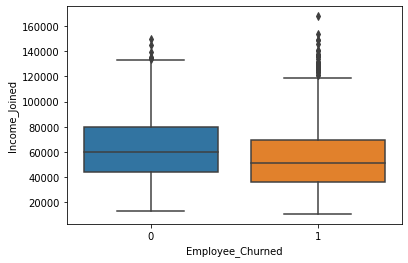

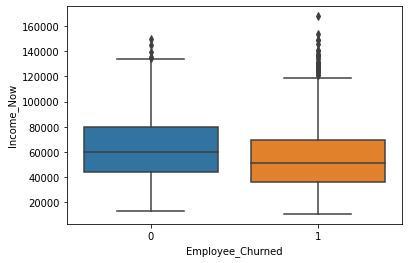

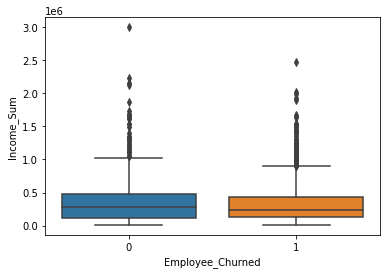

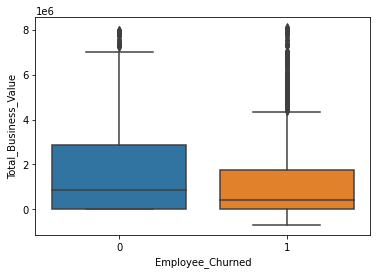

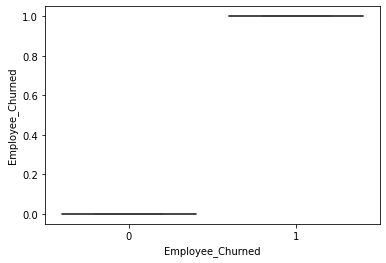

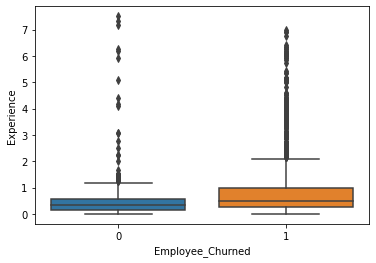

In [ ]:
for i in numerical_columns:
    sns.boxplot(y=i,x='Employee_Churned',data=df_new)    
    plt.show()

Observations and Insights

1. The age of employees who churned and who are staying are same.
2. The income at the time of joining is less for the employees who churned than the employees staying.
3. Total business value for the employees who churned is less than the employees who are staying
4. Experience of employees who churned have more than the employees who are staying.

In [ ]:
df_new.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income_Joined',
       'Income_Now', 'Income_Sum', 'Joining_Designation', 'Grade_Now',
       'Total_Business_Value', 'Quarterly_Rating_Joined',
       'Quarterly_Rating_Now', 'Employee_Churned', 'Quarterly_Increment',
       'Experience'],
      dtype='object')

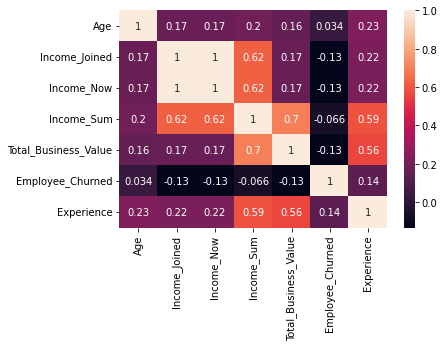

In [ ]:
sns.heatmap(df_new.corr(),annot=True)

In [ ]:
# df_new.drop(columns=['Income_Sum','Age'],axis=1,inplace=True)

In [ ]:
df_new.drop(columns=['Income_Now','Income_Sum','Age'],axis=1,inplace=True)

#Data Preprocessing

In [ ]:
df_new.isna().sum()/df_new.shape[0]

Gender                     0.0
City                       0.0
Education_Level            0.0
Income_Joined              0.0
Joining_Designation        0.0
Grade_Now                  0.0
Total_Business_Value       0.0
Quarterly_Rating_Joined    0.0
Quarterly_Rating_Now       0.0
Employee_Churned           0.0
Quarterly_Increment        0.0
Experience                 0.0
dtype: float64

In [ ]:
df_new[df_new.duplicated()]

,Gender,City,Education_Level,Income_Joined,Joining_Designation,Grade_Now,Total_Business_Value,Quarterly_Rating_Joined,Quarterly_Rating_Now,Employee_Churned,Quarterly_Increment,Experience


In [ ]:
categorical_columns=df_new.select_dtypes('category').columns
numerical_columns=df_new.select_dtypes('float64').columns

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   2109 non-null   category
 1   City                     2109 non-null   category
 2   Education_Level          2109 non-null   category
 3   Income_Joined            2109 non-null   int64   
 4   Joining_Designation      2109 non-null   category
 5   Grade_Now                2109 non-null   category
 6   Total_Business_Value     2109 non-null   int64   
 7   Quarterly_Rating_Joined  2109 non-null   category
 8   Quarterly_Rating_Now     2109 non-null   category
 9   Employee_Churned         2109 non-null   int64   
 10  Quarterly_Increment      2109 non-null   category
 11  Experience               2109 non-null   float64 
dtypes: category(8), float64(1), int64(3)
memory usage: 165.9 KB


In [ ]:
df_new['Income_Joined']=df_new['Income_Joined'].astype('float64')
df_new['Total_Business_Value']=df_new['Total_Business_Value'].astype('float64')
df_new['Employee_Churned']=df_new['Employee_Churned'].astype('float64')

In [ ]:
categorical_columns,numerical_columns

(Index(['Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade_Now',
        'Quarterly_Rating_Joined', 'Quarterly_Rating_Now',
        'Quarterly_Increment'],
       dtype='object'), Index(['Experience'], dtype='object'))

In [ ]:
for i in categorical_columns:
  print(f'{i}: {df_new[i].nunique()}')

Gender: 2
City: 29
Education_Level: 3
Joining_Designation: 5
Grade_Now: 5
Quarterly_Rating_Joined: 4
Quarterly_Rating_Now: 4
Quarterly_Increment: 2


for city we can use target encoding and the rest we use one hot encoding

##Target Encoding

In [ ]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()

In [ ]:
target_encoders_cols=['City']

In [ ]:
for i in target_encoders_cols:
  df_new[i+'_target_encoded']=encoder.fit_transform(df_new[i],df_new['Employee_Churned'])

In [ ]:
df_new=df_new.drop(target_encoders_cols,axis=1)

In [ ]:
df_new.head(3)

,Gender,Education_Level,Income_Joined,Joining_Designation,Grade_Now,Total_Business_Value,Quarterly_Rating_Joined,Quarterly_Rating_Now,Employee_Churned,Quarterly_Increment,Experience,City_target_encoded
0,0.0,2,57387.0,1,1,-665480.0,2,2,1.0,0,0.246412,0.802817
1,0.0,2,67016.0,2,2,0.0,1,1,0.0,0,0.082137,0.720588
2,0.0,2,65603.0,2,2,350000.0,1,1,1.0,0,0.334025,0.903226


##Label Encoding

In [ ]:
label_encoders_cols=['Gender','Quarterly_Increment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in label_encoders_cols:
  df_new[i+'_label_encoded']=le.fit_transform(df_new[i])

In [ ]:
df_new=df_new.drop(label_encoders_cols,axis=1)

In [ ]:
df_new[[i+'_label_encoded' for i in label_encoders_cols]]

,Gender_label_encoded,Quarterly_Increment_label_encoded
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
2375,0,0
2377,1,0
2378,0,0
2379,1,0


In [ ]:
label_encoders_cols,target_encoders_cols

(['Gender', 'Quarterly_Increment'], ['City'])

##Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_columns=['Education_Level', 'Joining_Designation', 'Grade_Now',
       'Quarterly_Rating_Joined', 'Quarterly_Rating_Now',]
ordinal_columns

['Education_Level',
 'Joining_Designation',
 'Grade_Now',
 'Quarterly_Rating_Joined',
 'Quarterly_Rating_Now']

In [ ]:
def feature_engineering(df,ordinal_columns):
  ordinal_encoding_columns=ordinal_columns
  for col in ordinal_encoding_columns:
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()
    df[[col]]=enc.fit_transform(df[[col]])
    # df=pd.concat([df,pd.get_dummies(df[col],prefix=col).iloc[:,1:]],axis=1)
    # df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
  # df.drop(columns=ordinal_encoding_columns,inplace=True)
  return df

In [ ]:
for i in ordinal_columns:
  # print([i])
  df_new=feature_engineering(df_new,[i])
  # df.head()

In [ ]:
for i in ordinal_columns:
  print(f'{i}:{df_new[i].unique()}')

Education_Level:[2. 0. 1.]
Joining_Designation:[0. 1. 2. 3. 4.]
Grade_Now:[0. 1. 2. 3. 4.]
Quarterly_Rating_Joined:[1. 0. 3. 2.]
Quarterly_Rating_Now:[1. 0. 2. 3.]


In [ ]:
df_new

,Education_Level,Income_Joined,Joining_Designation,Grade_Now,Total_Business_Value,Quarterly_Rating_Joined,Quarterly_Rating_Now,Employee_Churned,Experience,City_target_encoded,Gender_label_encoded,Quarterly_Increment_label_encoded
0,2.0,57387.0,0.0,0.0,-665480.0,1.0,1.0,1.0,0.246412,0.802817,0,0
1,2.0,67016.0,1.0,1.0,0.0,0.0,0.0,0.0,0.082137,0.720588,0,0
2,2.0,65603.0,1.0,1.0,350000.0,0.0,0.0,1.0,0.334025,0.903226,0,0
3,0.0,46368.0,0.0,0.0,120360.0,0.0,0.0,1.0,0.161537,0.753623,0,0
4,1.0,78728.0,2.0,2.0,1265000.0,0.0,1.0,0.0,0.418900,0.750000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2375,1.0,29582.0,0.0,0.0,0.0,0.0,0.0,1.0,0.251887,0.619048,0,0
2377,0.0,12105.0,0.0,0.0,0.0,0.0,0.0,1.0,0.167012,0.753623,1,0
2378,0.0,35370.0,1.0,1.0,2815090.0,1.0,0.0,1.0,1.169086,0.619048,0,0
2379,2.0,69498.0,0.0,0.0,977830.0,1.0,0.0,1.0,0.917199,0.771429,1,0


##X&Y Separation

In [ ]:
X = df_new[df_new.columns.drop('Employee_Churned')]
Y = df_new["Employee_Churned"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train,Y_train

(      Education_Level  Income_Joined  Joining_Designation  Grade_Now  \
 66                1.0        89013.0                  2.0        2.0   
 300               0.0        60555.0                  0.0        0.0   
 2057              1.0        17648.0                  0.0        0.0   
 435               0.0        68751.0                  0.0        0.0   
 1593              0.0        42573.0                  1.0        1.0   
 ...               ...            ...                  ...        ...   
 1093              2.0        55419.0                  1.0        1.0   
 1028              1.0        62599.0                  2.0        2.0   
 1240              1.0        48050.0                  2.0        2.0   
 264               1.0        59936.0                  1.0        1.0   
 1201              2.0        29181.0                  0.0        0.0   
 
       Total_Business_Value  Quarterly_Rating_Joined  Quarterly_Rating_Now  \
 66                     0.0                 

In [ ]:
X_test,Y_test

(      Education_Level  Income_Joined  Joining_Designation  Grade_Now  \
 1130              1.0        17493.0                  0.0        0.0   
 1594              0.0        63739.0                  2.0        2.0   
 1855              0.0        11889.0                  0.0        0.0   
 956               0.0        71977.0                  2.0        2.0   
 1905              0.0        21935.0                  0.0        0.0   
 ...               ...            ...                  ...        ...   
 1310              0.0        48956.0                  0.0        0.0   
 412               1.0       132558.0                  2.0        2.0   
 12                1.0        31631.0                  0.0        0.0   
 1227              1.0        48540.0                  1.0        1.0   
 2060              2.0        73899.0                  1.0        1.0   
 
       Total_Business_Value  Quarterly_Rating_Joined  Quarterly_Rating_Now  \
 1130              478360.0                 

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [ ]:
Y_train.value_counts()

1.0    1257
0.0     430
Name: Employee_Churned, dtype: int64

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, Y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({1.0: 1257, 0.0: 1257})


#Model Building

##Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
kfold = KFold(n_splits=5)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 85.57103920485046 Validation: 78.11917340578046
K-Fold Accuracy Std: Train: 1.3785569157998276 Validation: 4.774276458308261


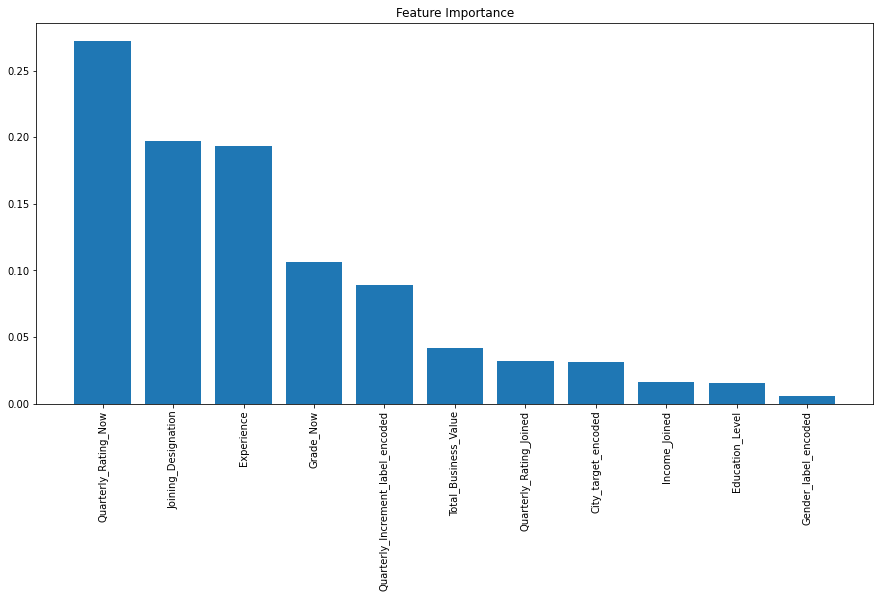

In [ ]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
test_y_pred = clf.predict(X_test)
test_score = f1_score(Y_test, test_y_pred)

In [ ]:
test_score

0.8636363636363638

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(Y_test, clf.predict(X_test))
print(conf_mat)

[[ 72  40]
 [ 44 266]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score , f1_score, plot_confusion_matrix,classification_report

<Figure size 576x576 with 0 Axes>

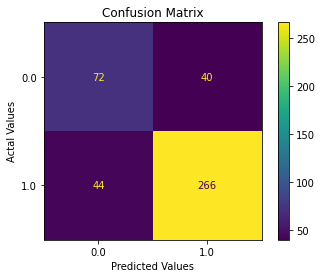

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(clf,X_test,Y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_score(Y_test,clf.predict(X_test))

0.8636363636363638

In [ ]:
accuracy_score(Y_test,clf.predict(X_test))

0.8009478672985783

In [ ]:
recall_score(Y_test,clf.predict(X_test))

0.8580645161290322

In [ ]:
precision_score(Y_test,clf.predict(X_test))

0.869281045751634

##ROC AUC curve

In [ ]:
(Y_test==clf.predict(X_test)).sum()/Y_test.shape[0]

0.8009478672985783

In [ ]:
Y_test_pred=clf.predict(X_test)

In [ ]:
Y_proba=clf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(Y_test_pred, Y_proba)

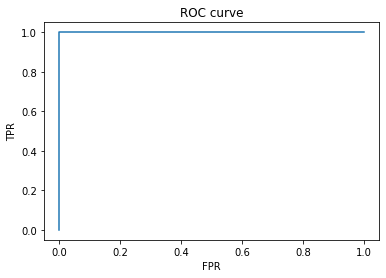

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
fpr,tpr,thr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17241379, 0.18965517, 0.82758621,
        0.84482759, 1.        ]),
 array([0.        , 0.00326797, 0.80392157, 0.81045752, 0.97385621,
        0.98039216, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 array([1.91754375, 0.91754375, 0.6203064 , 0.61945025, 0.51793879,
        0.51789189, 0.50257939, 0.4338885 , 0.43062783, 0.17966237,
        0.17809183, 0.13696308]))

In [ ]:
roc_auc_score(Y_test_pred, Y_proba)

1.0

##PR AUC Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(Y_test_pred, Y_proba)

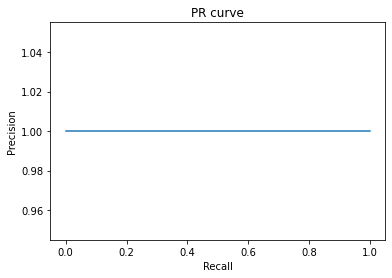

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

1.0

In [ ]:
precision,recall,thr

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [ ]:
np.argmax(recall)

0

In [ ]:
Y_proba

array([0.83338084, 0.54183079, 0.87380798, 0.22149147, 0.86049045,
       0.51694566, 0.32531111, 0.9126407 , 0.19689499, 0.49682326,
       0.76132626, 0.62936091, 0.43712968, 0.78290979, 0.64856088,
       0.78770436, 0.60670472, 0.39054206, 0.54747039, 0.62847406,
       0.2218457 , 0.1743632 , 0.42216005, 0.78267811, 0.2366353 ,
       0.82024226, 0.61776318, 0.80626938, 0.89119216, 0.63237925,
       0.64604235, 0.83146906, 0.82044139, 0.29131938, 0.51814522,
       0.63657965, 0.81153048, 0.68450251, 0.58084705, 0.25062962,
       0.81733615, 0.49400435, 0.75448625, 0.5343326 , 0.39179297,
       0.51789189, 0.17966237, 0.27270208, 0.67401208, 0.76421156,
       0.57045167, 0.82399609, 0.30494529, 0.22123926, 0.26938904,
       0.70542573, 0.14148686, 0.52460779, 0.74538976, 0.77580544,
       0.4493854 , 0.51196096, 0.23445304, 0.5727953 , 0.41829527,
       0.83348822, 0.87577225, 0.86936825, 0.89617577, 0.37685516,
       0.71144299, 0.70590807, 0.86501741, 0.87974623, 0.78109

In [ ]:
new_Y_pred=np.array([1 if i>=0.30 else 0 for i in Y_proba])
new_Y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
(Y_test==new_Y_pred).sum()/Y_test.shape[0]

0.8080568720379147

In [ ]:
f1_score(Y_test,new_Y_pred)

0.88

In [ ]:
precision_score(Y_test,new_Y_pred)

0.8136986301369863

In [ ]:
recall_score(Y_test,new_Y_pred)

0.9580645161290322

**So by randomly I took threshold value as 0.30 so that the precison, recall are at optimal levels and maximizing the f1 score and accuracy**

##Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


tree_clf = GradientBoostingClassifier(random_state=7, max_depth = 4, n_estimators= 50, learning_rate = 0.1 )
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = 3, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")


K-Fold Accuracy Mean: Train: 93.7 Validation: 84.39999999999999


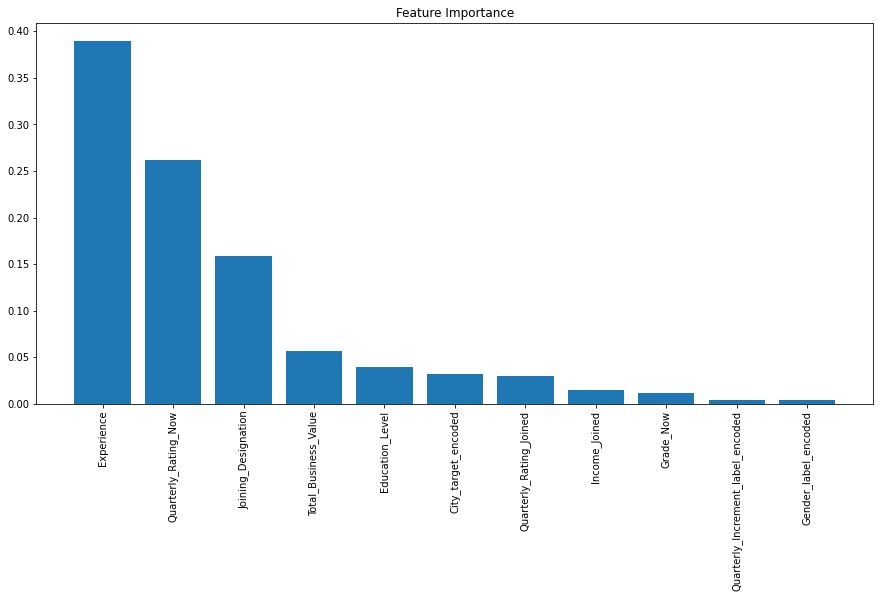

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

tree_clf = GradientBoostingClassifier(random_state=7, max_depth = 4, n_estimators= 50, learning_rate = 0.1)
tree_clf.fit(X_sm, y_sm)
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() 

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
test_y_pred = tree_clf.predict(X_test)
test_score = f1_score(Y_test, test_y_pred)

In [ ]:
test_score

0.8913385826771654

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat = confusion_matrix(Y_test, tree_clf.predict(X_test))
print(conf_mat)

[[ 70  42]
 [ 27 283]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score , f1_score, plot_confusion_matrix,classification_report

<Figure size 576x576 with 0 Axes>

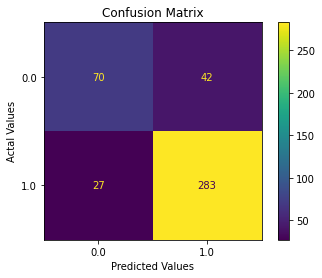

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(tree_clf,X_test,Y_test)
#sns.heatmap(cm_df, annot=True,cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
f1_score(Y_test,tree_clf.predict(X_test))

0.8913385826771654

In [ ]:
accuracy_score(Y_test,tree_clf.predict(X_test))

0.8364928909952607

In [ ]:
recall_score(Y_test,tree_clf.predict(X_test))

0.9129032258064517

In [ ]:
precision_score(Y_test,tree_clf.predict(X_test))

0.8707692307692307

##ROC AUC curve

In [ ]:
(Y_test==tree_clf.predict(X_test)).sum()/Y_test.shape[0]

0.8364928909952607

In [ ]:
Y_test_pred=tree_clf.predict(X_test)

In [ ]:
Y_proba=tree_clf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(Y_test_pred, Y_proba)

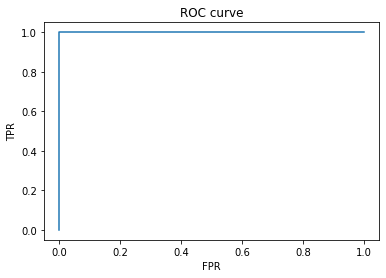

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
fpr,tpr,thr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.35051546, 0.37113402, 1.        ]),
 array([0.        , 0.00307692, 0.15076923, 0.15692308, 0.30769231,
        0.31384615, 0.44      , 0.44615385, 0.49846154, 0.50461538,
        0.71384615, 0.72      , 0.72307692, 0.72923077, 0.79384615,
        0.8       , 0.82461538, 0.83076923, 0.88923077, 0.89538462,
        1.        , 1.        , 1.        , 1.        ]),
 array([1.97867631, 0.97867631, 0.95019014, 0.94956817, 0.92844959,
        0.92738317, 0.9122612 , 0.91074701, 0.89350706, 0.89179899,
        0.80742025, 0.80498741, 0.80331167, 0.8032563 , 0.75953507,
        0.7558449 , 0.74597084, 0.74501084, 0.67382399, 0.66959334,
        0.50015468, 0.30603147, 0.30008626, 0.05842985]))

In [ ]:
roc_auc_score(Y_test_pred, Y_proba)

1.0

##PR AUC Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(Y_test_pred, Y_proba)

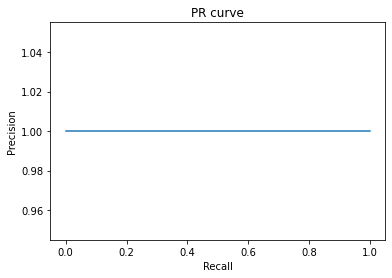

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

1.0

In [ ]:
precision,recall,thr

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [ ]:
np.argmax(recall)

0

In [ ]:
Y_proba

array([0.94887329, 0.82353505, 0.944046  , 0.10849723, 0.92868872,
       0.80498741, 0.23772956, 0.97267919, 0.28331349, 0.81364439,
       0.81765456, 0.88305684, 0.61572607, 0.92301901, 0.85742491,
       0.92478099, 0.5746622 , 0.83817794, 0.50015468, 0.81392805,
       0.093061  , 0.3827253 , 0.69395763, 0.91431162, 0.31641405,
       0.9420394 , 0.89635033, 0.93951286, 0.95553066, 0.76203943,
       0.77488345, 0.8597664 , 0.96328622, 0.40657381, 0.61369874,
       0.77254399, 0.92326388, 0.83519196, 0.69201838, 0.11190472,
       0.92523576, 0.81117391, 0.80246163, 0.80498741, 0.55013723,
       0.8032563 , 0.19233372, 0.39159986, 0.91074701, 0.87986878,
       0.70967757, 0.94910937, 0.12617627, 0.31894267, 0.06457818,
       0.78932557, 0.08304679, 0.80331167, 0.73277565, 0.89591431,
       0.51082607, 0.63208552, 0.28581506, 0.79756987, 0.61842297,
       0.9122612 , 0.93621621, 0.87409854, 0.96534186, 0.19022437,
       0.92084239, 0.90209571, 0.97867631, 0.96956238, 0.89179

In [ ]:
new_Y_pred=np.array([1 if i>=.5 else 0 for i in Y_proba])
new_Y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [ ]:
(Y_test==new_Y_pred).sum()/Y_test.shape[0]

0.8364928909952607

In [ ]:
f1_score(Y_test,new_Y_pred)

0.8913385826771654

In [ ]:
precision_score(Y_test,new_Y_pred)

0.8707692307692307

In [ ]:
recall_score(Y_test,new_Y_pred)

0.9129032258064517

**So by randomly I took threshold value as 0.5 so that the precison, recall are at optimal levels and maximizing the f1 score and accuracy**

#Insights and Recommendations

Insights and Recommendations

1. Recall is high and almost we are identifying the persons who are leaving
2. Precision has come slightly low value which indicates need to fine tuned with some other hyperparameters or changing threshold.
3. Boosting algorithm has better performance compared to Bagging
4. Among all the features like Quarterly rating now, designation joined, Experience have high effect on attrition rate.
5. The f1_score is highest for the threshold value at 0.5 in Boosting algorithm considering the precision also to be high.
6. Whoever joined in grade 1 and currently under grade 1, are the ones who leaving the company.
7. Whoever not received quarterly increment, their churn chances are more.


1. In order to reduce false positives (not to predict staying persons as leaving, threshold has to be increased further)
2. No.of rides and duration or working  hours will be helpful as it collectively gives information the earnings per ride.